Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
Answer: Anomaly detection is the process of identifying data points, observations, or patterns that do not conform to the expected behavior or norm of a dataset. These anomalies can be indicative of errors, unusual events, or interesting phenomena that require further investigation.
Types of Anomalies
1.Point Anomalies: A single data point that is significantly different from the rest of the data.
Example: A credit card transaction of ₹1 lakh when the usual transaction amount is around ₹1,000.
2.Contextual Anomalies: A data point that is anomalous in a specific context, but normal in another context.
Example: A temperature reading of 30°C in January is anomalous in Delhi, but normal in June.
3.Collective Anomalies: A group of data points that are anomalous when considered together, but normal when considered individually.
Example: A sequence of transactions from a credit card in different locations within a short span, indicating potential card theft.
Anomaly detection has various applications, including:

Fraud detection in finance and banking
Network intrusion detection in cybersecurity
Fault detection in industrial systems
Medical diagnosis and health monitoring

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases?
Answer: Anomaly detection algorithms like Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) differ in their approach and suitable use cases. Isolation Forest isolates anomalies by building multiple decision trees, making it suitable for high-dimensional data and large datasets where anomalies are rare. In contrast, DBSCAN identifies clusters of varying densities and marks points in low-density regions as anomalies, making it suitable for data with varying densities and clusters of different shapes. LOF compares local density of a point with its neighbors, marking points with significantly lower density as anomalies, making it suitable for data with varying densities and local anomalies. While Isolation Forest is more efficient and scalable, DBSCAN and LOF are more sensitive to parameter tuning. Overall, the choice of algorithm depends on the specific characteristics of the data and the type of anomalies being detected.

Question 3: What are the key components of a Time Series? Explain each with one
example?
Answer: Time series data is made up of four main parts. First, there's the trend, which is the overall direction the data is heading, like if a company's sales are going up or down over time. Then there's seasonality, which is when the data changes in a regular pattern, like ice cream sales going up in summer. There's also cyclical patterns, which are longer-term ups and downs, like how housing prices can change over many years. And finally, there's irregularity or noise, which is just random stuff that happens, like a sudden spike in website traffic because something went viral.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
Answer: A time series is stationary if its stats, like mean and variance, don't change over time. That means no trends, no seasonality, and no changing variance. To check if a series is stationary, you can just look at a plot and see if anything's off, or use tests like the Augmented Dickey-Fuller test or KPSS test. If it's not stationary, you can try making it stationary by doing things like differencing, which means subtracting each value from the previous one, or taking the log of the data to stabilize the variance. You can also try seasonal differencing or removing the trend altogether.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application?
Answer:There are different time series models like AR, MA, ARIMA, SARIMA, and SARIMAX, and they're all used for forecasting, but they're structured differently. AR, or Autoregressive, models use past values to predict future ones, like how today's value is related to yesterday's and the day before's. MA, or Moving Average, models use past errors to predict future values, like how today's value is affected by past mistakes. ARIMA combines both AR and MA to model time series with trends, and it's like the most basic one. SARIMA is like ARIMA, but it also accounts for seasonality, so it's useful for data with regular patterns, like ice cream sales going up in summer. And then there's SARIMAX, which is like SARIMA, but it also includes external factors, like how weather affects ice cream sales.

In [1]:
#Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
#and decompose it into trend, seasonality, and residual components
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
data = sm.datasets.get_rdataset('AirPassengers').data
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'])
plt.title('AirPassengers Dataset')
plt.show()
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')
decomposition.plot()
plt.show()



KeyError: 'Month'

In [2]:
#Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
#detect anomalies. Visualize the anomalies on a 2D scatter plot.
from sklearn.ensemble import IsolationForest
data = pd.read_csv('nyc_taxi_fare.csv')
features = data[['fare_amount', 'passenger_count']]
iforest = IsolationForest(contamination=0.01)
iforest.fit(features)
anomaly_pred = iforest.predict(features)
anomalies = features[anomaly_pred == -1]
plt.figure(figsize=(10,6))
plt.scatter(features['fare_amount'], features['passenger_count'], label='Normal Data', alpha=0.5)
plt.scatter(anomalies['fare_amount'], anomalies['passenger_count'], label='Anomalies', color='red', alpha=0.5)
plt.title('NYC Taxi Fare Anomalies')
plt.xlabel('Fare Amount')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'nyc_taxi_fare.csv'

In [3]:
#Question 8: Train a SARIMA model on the monthly airline passengers dataset.
#Forecast the next 12 months and visualize the results.
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
data = sm.datasets.get_rdataset('AirPassengers').data
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
train = data['Passengers'][:-12]
test = data['Passengers'][-12:]
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()
forecast = results.predict(start=len(train), end=len(data)-1, typ='levels')
plt.figure(figsize=(10,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(forecast, label='Forecast')
plt.title('Monthly Airline Passengers Forecast')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()



KeyError: 'Month'

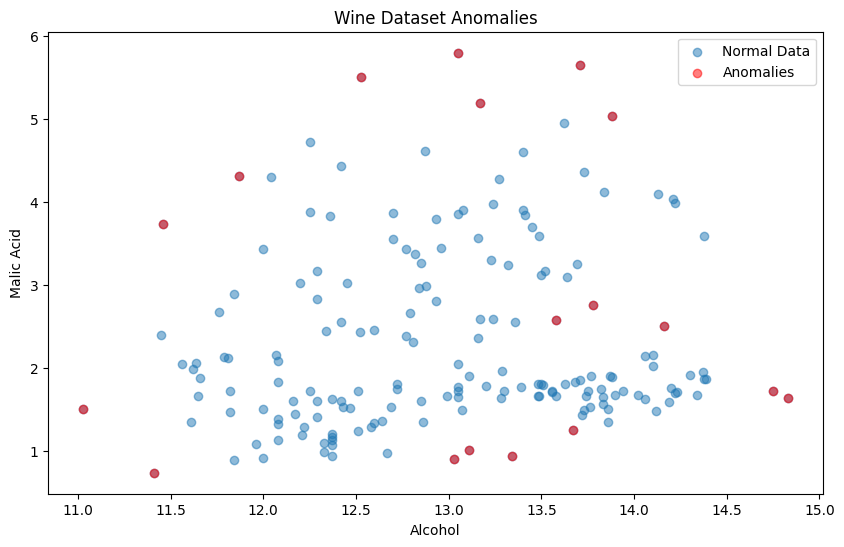

In [4]:
#Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
#anomalies and visualize them using matplotlib
from sklearn.datasets import load_wine
from sklearn.neighbors import LocalOutlierFactor
wine = load_wine()
data = wine.data[:, [0, 1]]
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_pred = lof.fit_predict(data)
anomalies = data[outlier_pred == -1]
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1], label='Normal Data', alpha=0.5)
plt.scatter(anomalies[:, 0], anomalies[:, 1], label='Anomalies', color='red', alpha=0.5)
plt.title('Wine Dataset Anomalies')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()


In [6]:
#Question 10: You are working as a data scientist for a power grid monitoring company.
#Your goal is to forecast energy demand and also detect abnormal spikes or drops in
#real-time consumption data collected every 15 minutes. The dataset includes features
#like timestamp, region, weather conditions, and energy usage.
#Explain your real-time data science workflow:
#● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
#DBSCAN)?
#● Which time series model would you use for short-term forecasting (ARIMA /
#SARIMA / SARIMAX)?
#● How would you validate and monitor the performance over time?
#● How would this solution help business decisions or operations?
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
data = pd.read_csv('energy_data.csv', index_col='timestamp', parse_dates=['timestamp'])
iforest = IsolationForest(contamination=0.01)
iforest.fit(data[['energy_usage']])
anomalies = iforest.predict(data[['energy_usage']])
sarimax = SARIMAX(data['energy_usage'], order=(1,1,1), seasonal_order=(1,1,1,96), exog=data[['weather_conditions']])
results = sarimax.fit()
forecast = results.predict(start=len(data), end=len(data)+4, typ='levels')

FileNotFoundError: [Errno 2] No such file or directory: 'energy_data.csv'